In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
df = pd.read_csv("student-scores.csv")  
df

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
1996,1997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
1997,1998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
1998,1999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


In [22]:
score_cols = ["math_score", "history_score", "physics_score",
              "chemistry_score", "biology_score", "english_score", "geography_score"]

In [23]:
# 1. Measures of Central Tendency

print("Central Tendency")
print("Mean:\n", df[score_cols].mean())
print("Median:\n", df[score_cols].median())
print("Mode:\n", df[score_cols].mode().iloc[0])

Central Tendency
Mean:
 math_score         83.4520
history_score      80.3320
physics_score      81.3365
chemistry_score    79.9950
biology_score      79.5815
english_score      81.2775
geography_score    80.8880
dtype: float64
Median:
 math_score         87.0
history_score      82.0
physics_score      83.0
chemistry_score    81.0
biology_score      81.0
english_score      83.0
geography_score    81.0
dtype: float64
Mode:
 math_score          99.0
history_score       88.0
physics_score       96.0
chemistry_score     94.0
biology_score      100.0
english_score       90.0
geography_score     88.0
Name: 0, dtype: float64


In [24]:
# 2. Measures of Dispersion

print("Dispersion")
print("Variance:\n", df[score_cols].var())
print("Standard Deviation:\n", df[score_cols].std())
print("Range:\n", df[score_cols].max() - df[score_cols].min())

Dispersion
Variance:
 math_score         174.898145
history_score      162.206879
physics_score      157.237887
chemistry_score    163.274612
biology_score      188.298507
english_score      144.650819
geography_score    135.436174
dtype: float64
Standard Deviation:
 math_score         13.224906
history_score      12.736046
physics_score      12.539453
chemistry_score    12.777895
biology_score      13.722190
english_score      12.027087
geography_score    11.637705
dtype: float64
Range:
 math_score         60
history_score      50
physics_score      50
chemistry_score    50
biology_score      70
english_score      49
geography_score    40
dtype: int64


In [26]:
# 3. Frequency Distribution

print("Frequency Distribution (Gender)")
print(df['gender'].value_counts())

Frequency Distribution (Gender)
gender
female    1002
male       998
Name: count, dtype: int64


In [27]:
# 4. Correlation Analysi

print(" Correlation Matrix")
print(df[score_cols].corr())

 Correlation Matrix
                 math_score  history_score  physics_score  chemistry_score  \
math_score         1.000000       0.147247       0.115719         0.127131   
history_score      0.147247       1.000000       0.048478         0.121498   
physics_score      0.115719       0.048478       1.000000         0.126163   
chemistry_score    0.127131       0.121498       0.126163         1.000000   
biology_score      0.081298       0.088502       0.132280         0.119992   
english_score      0.134831       0.147193       0.054314         0.068341   
geography_score    0.049672       0.065751       0.103126         0.065430   

                 biology_score  english_score  geography_score  
math_score            0.081298       0.134831         0.049672  
history_score         0.088502       0.147193         0.065751  
physics_score         0.132280       0.054314         0.103126  
chemistry_score       0.119992       0.068341         0.065430  
biology_score         1.000000

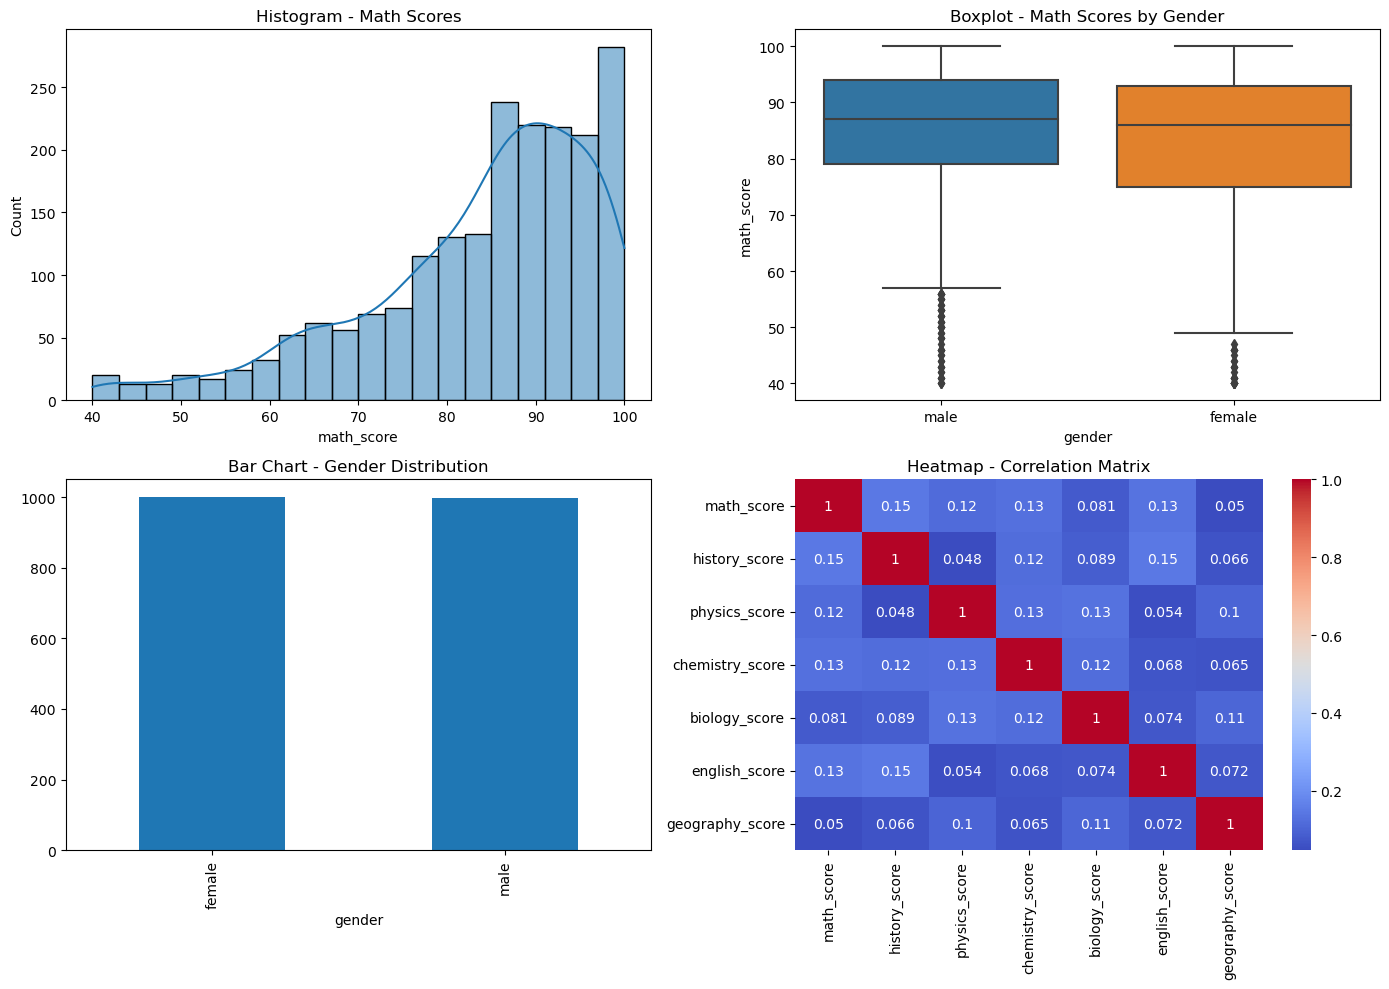

C:\Users\Prani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


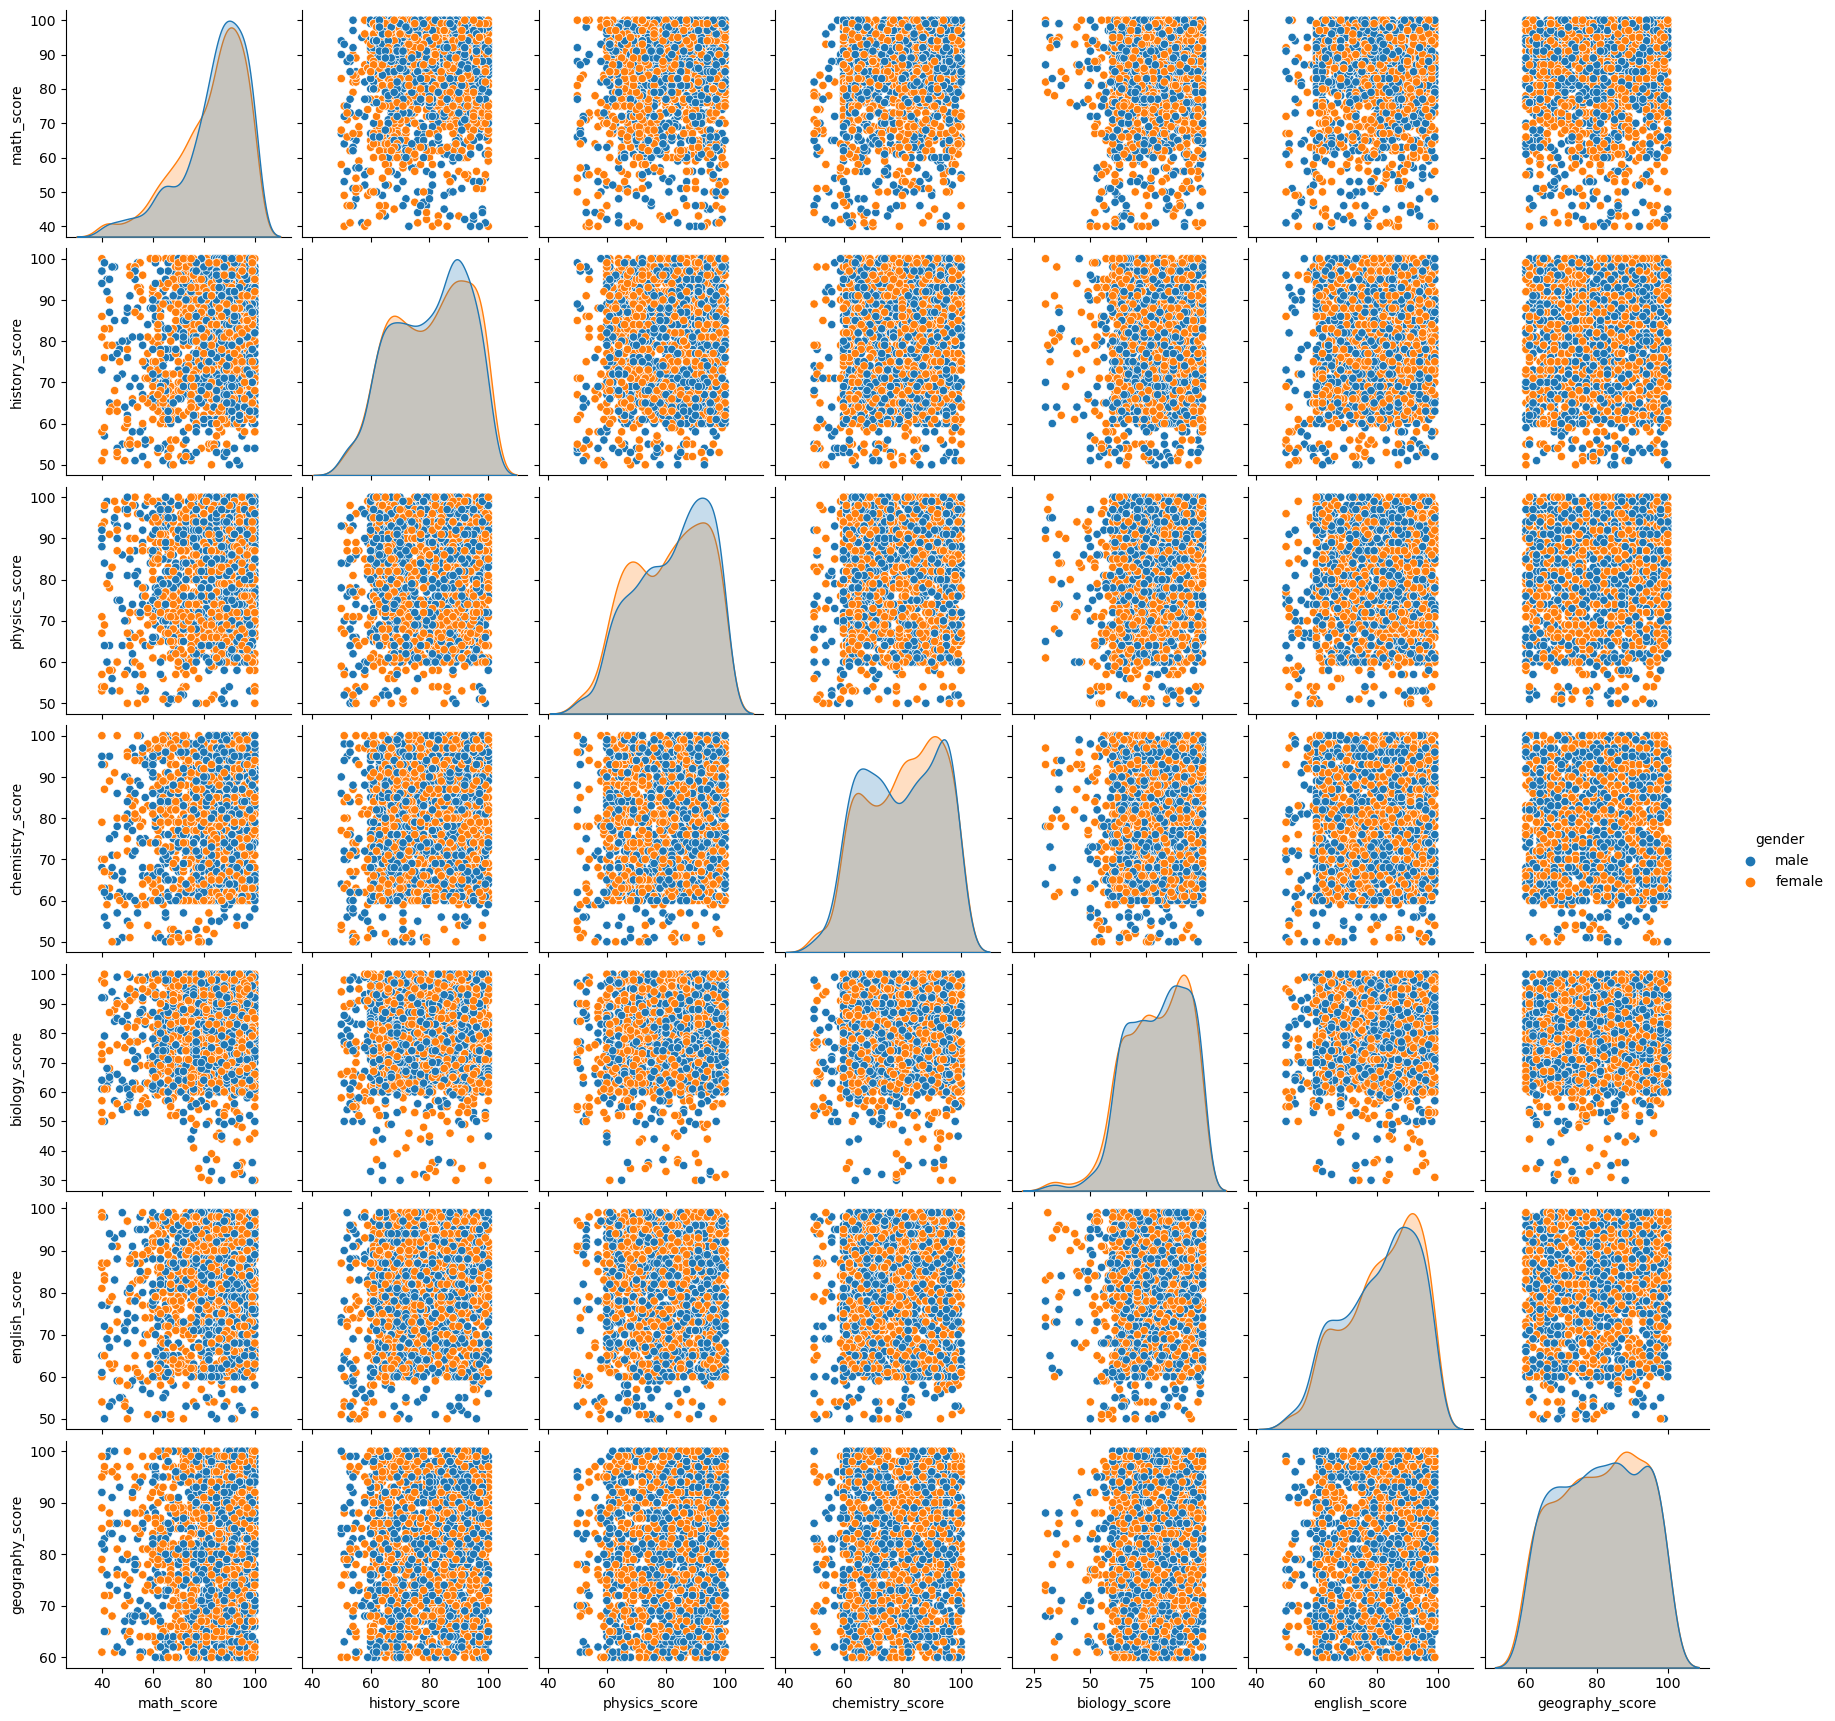

In [28]:
# 5. Visualizations

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
sns.histplot(df["math_score"], bins=20, kde=True)
plt.title("Histogram - Math Scores")

plt.subplot(2,2,2)
sns.boxplot(x="gender", y="math_score", data=df)
plt.title("Boxplot - Math Scores by Gender")

plt.subplot(2,2,3)
df['gender'].value_counts().plot(kind='bar')
plt.title("Bar Chart - Gender Distribution")

plt.subplot(2,2,4)
sns.heatmap(df[score_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap - Correlation Matrix")

plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df[score_cols + ["gender"]], hue="gender")
plt.show()


In [29]:
# 6. Skewness & Kurtosis

print("Skewness")
print(df[score_cols].skew())
print("\nKurtosis")
print(df[score_cols].kurtosis())

Skewness
math_score        -1.090145
history_score     -0.269966
physics_score     -0.346301
chemistry_score   -0.201933
biology_score     -0.529917
english_score     -0.456268
geography_score   -0.097094
dtype: float64

Kurtosis
math_score         0.800398
history_score     -0.993471
physics_score     -0.921761
chemistry_score   -1.095792
biology_score     -0.051999
english_score     -0.768893
geography_score   -1.159601
dtype: float64


In [30]:
# 7. Percentiles & Quartiles

print("Percentiles & Quartiles (Math Score)")
print("25th percentile:", np.percentile(df['math_score'], 25))
print("50th percentile:", np.percentile(df['math_score'], 50))
print("75th percentile:", np.percentile(df['math_score'], 75))

Percentiles & Quartiles (Math Score)
25th percentile: 77.0
50th percentile: 87.0
75th percentile: 93.0


In [31]:
# 8. Coefficient of Variation (CV)

print("Coefficient of Variation")
cv = df[score_cols].std() / df[score_cols].mean()
print(cv)

Coefficient of Variation
math_score         0.158473
history_score      0.158543
physics_score      0.154168
chemistry_score    0.159734
biology_score      0.172429
english_score      0.147976
geography_score    0.143874
dtype: float64


In [32]:
# 9. Z-scores

print("Z-Scores (Math Score)")
z_scores = stats.zscore(df['math_score'])
print(z_scores[:10])  

Z-Scores (Math Score)
0   -0.790525
1    0.495250
2   -0.185454
3   -0.941792
4    0.041447
5    0.722152
6    1.175955
7    0.873419
8    0.797785
9    1.100321
Name: math_score, dtype: float64


In [33]:
# 10. Interquartile Range (IQR)

print(" Interquartile Range (Math Score)")
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

 Interquartile Range (Math Score)
IQR: 16.0


In [34]:
# 11. Cross-tabulation

print("\nCross Tabulation (Gender vs Score Range in Math)")
ct = pd.crosstab(df['gender'], pd.cut(df['math_score'], bins=5))
print(ct)


Cross Tabulation (Gender vs Score Range in Math)
math_score  (39.94, 52.0]  (52.0, 64.0]  (64.0, 76.0]  (76.0, 88.0]  \
gender                                                                
female                 34            75           168           306   
male                   36            63           121           328   

math_score  (88.0, 100.0]  
gender                     
female                419  
male                  450  
